In [11]:
from matplotlib import pyplot

(a) (1 point) Visualization: Randomly select and visualize 5-6 images (no need to include
all the classes).

In [12]:
!pip install keras

In [13]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.1
!pip install -q keras==2.3.1
!pip install -q tensorflow-estimator==2.1.

In [14]:
from tensorflow import keras
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


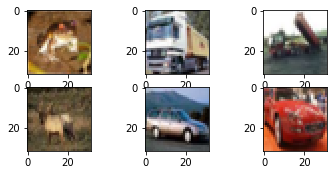

In [23]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# convert to grayscale images
from skimage.color import rgb2gray
#trainX = rgb2gray(trainX)
#testX = rgb2gray(testX)

# train / test dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot images
for i in range(6):
    pyplot.subplot(330 + 1 + i)
    # plot data
    pyplot.imshow(trainX[i])
pyplot.show()


(b) (1 point) Data exploration: Count the number of samples per class in the training data.

In [16]:
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    #encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

(d) (4 points) Image classification with CNNs: In this part, you will use a convolutional neural network (CNN) to perform the object classification task.

(d.i) (3 points) Experiment on the validation set with different CNN hyper-parameters, e.g.

#layers, filter size, stride size, activation function, dropout, weight regularization, etc. Choose 3 hyper-parameter combinations and for each combination, please do the following: (1) monitor the loss on the train and validation set across the epochs of the CNN training; (2) report the final classification accuracy on the training and validation sets; (3) report the running time for training the CNN; (4) report the # parameters that are learned for each CNN. How do these metrics compare to the FNN?

(d.ii) (1 point) Run the best model that was found based on the validation set from question (d.i) on the testing set. Report the classification accuracy on the testing set. How does this metric compare to the FNN?

In [56]:
# scale pixels
def normalize(train, test):
    # convert to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize- range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [68]:
#1 layer 
# cnn model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=
                     (32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [69]:
def run_test():
    # load data
    trainX, trainY, testX, testY = load_dataset()
    # normalize
    trainX, testX = normalize(trainX, testX)
    # model
    model = cnn_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))
    # eval model
    _, acc = model.evaluate(testX, testY, verbose=0)
    #print(history)
    #print('accuracy %.3f' % (acc * 100.0))
   
    
#entry point, run the test harness
run_test()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
___________________________________________

KeyboardInterrupt: 

In [70]:
#3 layers
# define cnn model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = normalize(trainX, testX)
    # define model
    model = cnn_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    #print(history)
    #print('accuracy %.3f' % (acc * 100.0))
    # learning curves
    #summarize_diagnostics(history)
    
#entry point, run the test harness
run_test_harness()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 8, 8, 128)       

KeyboardInterrupt: 

In [73]:
#dropout 
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

# define cnn model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = normalize(trainX, testX)
    # define model
    model =cnn_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print(history)
    print('accuracy %.3f' % (acc * 100.0))
   
 


In [74]:
run_test_harness()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 8, 8, 64)        

KeyboardInterrupt: 

In [76]:
#weight
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import l2

# define cnn model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX =normalize(trainX, testX)
    # define model
    model = cnn_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print(history)
    print('accuracy %.3f' % (acc * 100.0))
    # learning curves
    #summarize_diagnostics(history)
    
#entry point, run the test harness
run_test_harness()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 8, 8, 128)       

KeyboardInterrupt: 

In [63]:
#saving the model
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# define cnn model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
def run_test():
    trainX, trainY, testX, testY = load_dataset()
    trainX, testX = normalize(trainX, testX)
    model = cnn_model()
    model.fit(trainX, trainY, epochs=10, batch_size=64)
    model.save('final_model.h5')



In [64]:
run_test_harness()

Epoch 1/10
50000/50000 [==============================] - 84s 2ms/step - loss: 2.8770 - accuracy: 0.3718
Epoch 2/10
50000/50000 [==============================] - 83s 2ms/step - loss: 2.5098 - accuracy: 0.4974
Epoch 3/10
50000/50000 [==============================] - 84s 2ms/step - loss: 2.3173 - accuracy: 0.5650
Epoch 4/10
50000/50000 [==============================] - 83s 2ms/step - loss: 2.1564 - accuracy: 0.6151
Epoch 5/10
50000/50000 [==============================] - 83s 2ms/step - loss: 2.0202 - accuracy: 0.6559
Epoch 6/10
50000/50000 [==============================] - 83s 2ms/step - loss: 1.9132 - accuracy: 0.6841
Epoch 7/10
50000/50000 [==============================] - 94s 2ms/step - loss: 1.8234 - accuracy: 0.7094
Epoch 8/10
50000/50000 [==============================] - 87s 2ms/step - loss: 1.7453 - accuracy: 0.7271
Epoch 9/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.6722 - accuracy: 0.7460
Epoch 10/10
50000/50000 [==============================

In [65]:
# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

def run_test():
    trainX, trainY, testX, testY = load_dataset()
    trainX, testX = normalize(trainX, testX)
    # load model
    model = load_model('final_model.h5')
    # evaluate model 
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('accuracy %.3f' % (acc * 100.0))
 


In [67]:
run_test()

accuracy 69.870


In [45]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
 
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict_classes(img)
    print(result[0])
 


In [46]:
# entry point, run the example
run_example()

4


(e) (Bonus - 1.5 point) Bayesian optimization for hyper-parameter tuning: Instead
of performing grid or random search to tune the hyper-parameters of the CNN, we can also try
a model-based method for finding the optimal hyper-parameters through Bayesian optimiza-
tion. This method performs a more intelligent search on the hyper-parameter space in order
to estimate the best set of hyper-parameters for the data. Use publicly available libraries (e.g.,
hyperopt in Python) to perform a Bayesian optimization on the hyper-parameter space using
the validation set. Report the emotion classification accuracy on the testing set.
Hint: Check this and this source.

f) (Bonus - 1.5 point) Fine-tuning: Use a pre-trained CNN (e.g., the pre-trained example
of the MNIST dataset that we saw in class, or any other available pre-trained CNN) and fine-
tune it on the CIFAR-10 data. Please experiment with different fine-tuning hyper-parameters
(e.g., #layers to fine-tune, regularization during fine-tuning) on the validation set. Report the
classification accuracy for all hyper-parameter combinations on the validation set. Also report
the classification accuracy with the best hyper-parameter combination on the testing set.

In [47]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

# define cnn model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',
                     input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 

In [52]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=10, validation_data=(testX, testY))
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print(history)
    print('accuracy %.3f' % (acc * 100.0))

 


In [53]:
# entry point, run the test harness
run_test_harness()

Epoch 1/10
781/781 [==============================] - 202s 258ms/step - loss: 2.1222 - accuracy: 0.2966 - val_loss: 1.5170 - val_accuracy: 0.4468
Epoch 2/10
781/781 [==============================] - 196s 251ms/step - loss: 1.6311 - accuracy: 0.4074 - val_loss: 1.4228 - val_accuracy: 0.4763
Epoch 3/10
781/781 [==============================] - 194s 249ms/step - loss: 1.4848 - accuracy: 0.4592 - val_loss: 1.5538 - val_accuracy: 0.4381
Epoch 4/10
781/781 [==============================] - 197s 252ms/step - loss: 1.3960 - accuracy: 0.4890 - val_loss: 1.4756 - val_accuracy: 0.4529
Epoch 5/10
781/781 [==============================] - 199s 255ms/step - loss: 1.3238 - accuracy: 0.5191 - val_loss: 1.2942 - val_accuracy: 0.5188
Epoch 6/10
781/781 [==============================] - 193s 247ms/step - loss: 1.2749 - accuracy: 0.5393 - val_loss: 1.2025 - val_accuracy: 0.5600
Epoch 7/10
781/781 [==============================] - 191s 244ms/step - loss: 1.2238 - accuracy: 0.5584 - val_loss: 1.2078 -